# Git Config

In [1]:
!git config --global user.name ""
!git config --global user.email ""

# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv('recruitment_efficiency_improved.csv')
df.sample(6)

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate
1129,1130,Finance,Payroll Specialist,122,57,7054.57,Referral,0.76
2758,2759,HR,HR Coordinator,284,85,2845.23,LinkedIn,0.92
769,770,Engineering,Software Engineer,115,16,7150.65,LinkedIn,0.91
1427,1428,Product,Product Analyst,232,44,3840.71,Recruiter,0.67
1071,1072,Sales,Sales Associate,108,46,670.97,LinkedIn,0.72
360,361,Marketing,Social Media Manager,102,8,7878.22,Referral,0.66


# Cek struktur Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   recruitment_id         5000 non-null   int64  
 1   department             5000 non-null   object 
 2   job_title              5000 non-null   object 
 3   num_applicants         5000 non-null   int64  
 4   time_to_hire_days      5000 non-null   int64  
 5   cost_per_hire          5000 non-null   float64
 6   source                 5000 non-null   object 
 7   offer_acceptance_rate  5000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 312.6+ KB


Semua tipe data sudah sesuai

In [4]:
# Deskripsi Statistik Numerik
df.describe()

,recruitment_id,num_applicants,time_to_hire_days,cost_per_hire,offer_acceptance_rate
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,155.621000,47.191400,5214.826236,0.650832
std,1443.520003,84.164264,23.864934,2730.999185,0.202052
min,1.000000,10.000000,7.000000,507.160000,0.300000
25%,1250.750000,83.000000,26.000000,2820.597500,0.480000
50%,2500.500000,157.000000,47.000000,5218.290000,0.650000
75%,3750.250000,229.000000,67.000000,7611.412500,0.830000
max,5000.000000,299.000000,89.000000,9998.910000,1.000000


In [5]:
# Deksripsi statistik Kategorikal
df.describe(include='object')

,department,job_title,source
count,5000,5000,5000
unique,6,24,4
top,HR,HR Coordinator,LinkedIn
freq,871,238,1291


# Cek missing Value, Duplicate Data

In [6]:
df.isnull().sum()

recruitment_id           0
department               0
job_title                0
num_applicants           0
time_to_hire_days        0
cost_per_hire            0
source                   0
offer_acceptance_rate    0
dtype: int64

Tidak ada missing value

In [7]:
df.duplicated().sum()

np.int64(0)

Tidak ada duplicate Data

# Stage 1 - EDA

## Univariate Analisis

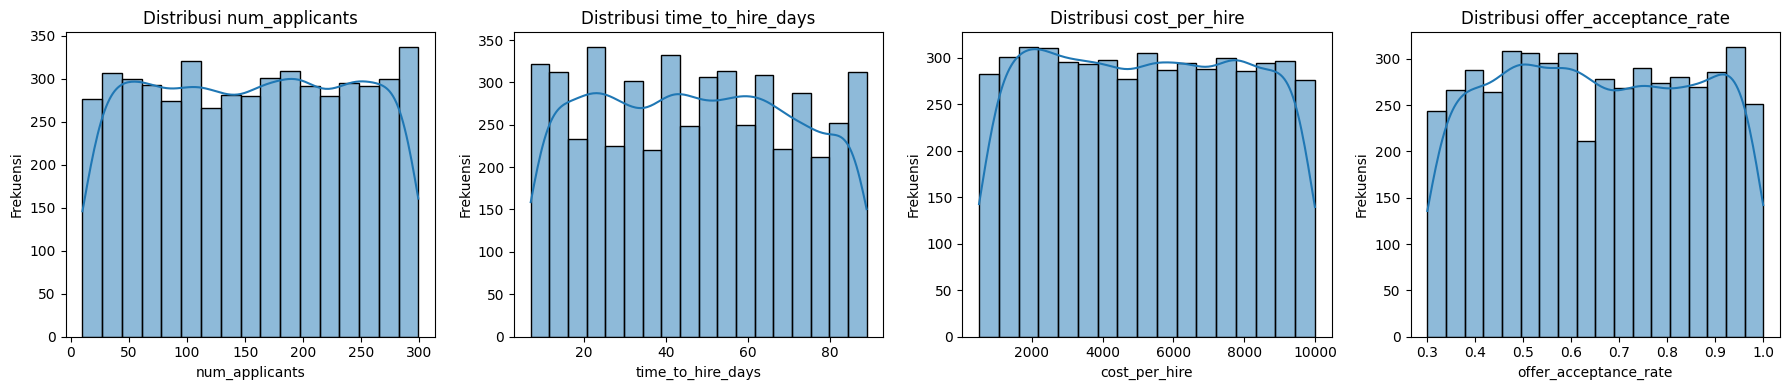

In [8]:

# Distribusi kolom numeric

num_cols = ['num_applicants','time_to_hire_days','cost_per_hire','offer_acceptance_rate']

plt.figure(figsize=(18, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


## Deteksi Skew dan Outlier

In [10]:
# Daftar kolom numerik
num_cols = ['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']

print("\n=== RINGKASAN ANALISIS NUMERIK ===")

outlier_summary = {}

for col in num_cols:
    # Hitung skewness
    skew_val = df[col].skew()

    # Hitung outlier dengan metode IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_summary[col] = outliers

    # === PRINT RINGKASAN ===
    print(f"\n▶ {col}")

    # Interpretasi skewness
    if skew_val > 1:
        print(f"   - Skewed Right (positif / condong kanan): {skew_val:.2f}")
    elif skew_val < -1:
        print(f"   - Skewed Left (negatif / condong kiri): {skew_val:.2f}")
    else:
        print(f"   - Distribusi mendekati normal: {skew_val:.2f}")

    # Interpretasi outlier
    if outliers > 0:
        print(f"   - Terdapat {outliers} outlier berdasarkan metode IQR.")
    else:
        print("   - Tidak ditemukan outlier signifikan.")



=== RINGKASAN ANALISIS NUMERIK ===

▶ num_applicants
   - Distribusi mendekati normal: -0.01
   - Tidak ditemukan outlier signifikan.

▶ time_to_hire_days
   - Distribusi mendekati normal: 0.04
   - Tidak ditemukan outlier signifikan.

▶ cost_per_hire
   - Distribusi mendekati normal: 0.02
   - Tidak ditemukan outlier signifikan.

▶ offer_acceptance_rate
   - Distribusi mendekati normal: 0.01
   - Tidak ditemukan outlier signifikan.



▶ Kolom: department
----------------------------------------
Jumlah kategori unik   : 6

Distribusi kategori:
             Frekuensi  Persentase (%)
department                            
HR                 871           17.42
Product            854           17.08
Finance            841           16.82
Sales              820           16.40
Marketing          811           16.22
Engineering        803           16.06

Tidak ada rare category (<1%).


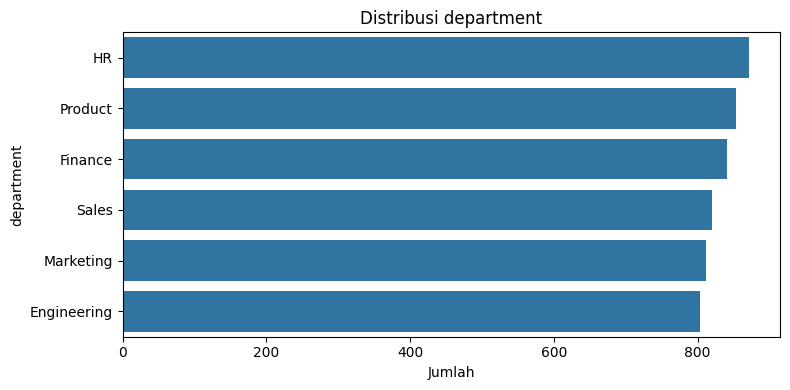


▶ Kolom: job_title
----------------------------------------
Jumlah kategori unik   : 24

Distribusi kategori:
                              Frekuensi  Persentase (%)
job_title                                              
HR Coordinator                      238            4.76
Financial Analyst                   234            4.68
UX Designer                         233            4.66
HR Manager                          223            4.46
Product Analyst                     221            4.42
Social Media Manager                217            4.34
Marketing Specialist                217            4.34
Business Development Manager        215            4.30
Data Engineer                       211            4.22
Talent Acquisition                  210            4.20
Payroll Specialist                  209            4.18
Software Engineer                   209            4.18
UI Designer                         206            4.12
Accountant                          205          

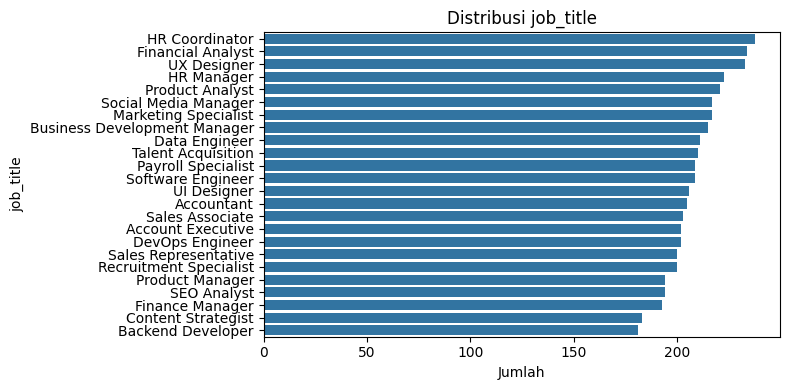


▶ Kolom: source
----------------------------------------
Jumlah kategori unik   : 4

Distribusi kategori:
            Frekuensi  Persentase (%)
source                               
LinkedIn         1291           25.82
Referral         1279           25.58
Recruiter        1221           24.42
Job Portal       1209           24.18

Tidak ada rare category (<1%).


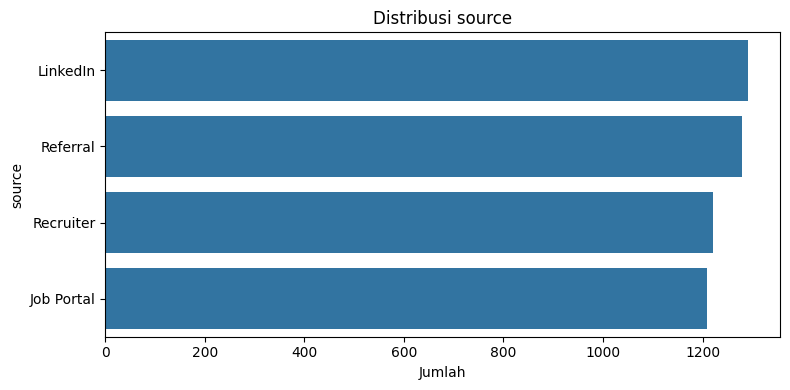

In [11]:
# Distribusi kolom kategorikal
cat_cols = ['department', 'job_title', 'source']


for col in cat_cols:
    print(f"\n▶ Kolom: {col}")
    print("-" * 40)

    # 1. Jumlah kategori
    unique_count = df[col].nunique()
    print(f"Jumlah kategori unik   : {unique_count}")

    # 2. Frekuensi & persentase
    freq = df[col].value_counts()
    pct = df[col].value_counts(normalize=True) * 100

    summary = pd.DataFrame({
        'Frekuensi': freq,
        'Persentase (%)': pct.round(2)
    })

    print("\nDistribusi kategori:")
    print(summary)

    # 3. Deteksi rare category (< 1%)
    rare = summary[summary['Persentase (%)'] < 1]
    if len(rare) > 0:
        print("\n⚠️ Rare categories (<1%):")
        print(rare)
    else:
        print("\nTidak ada rare category (<1%).")

    # 4. Visualisasi
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=freq.index)
    plt.title(f'Distribusi {col}')
    plt.xlabel("Jumlah")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## Bivariate Analisis

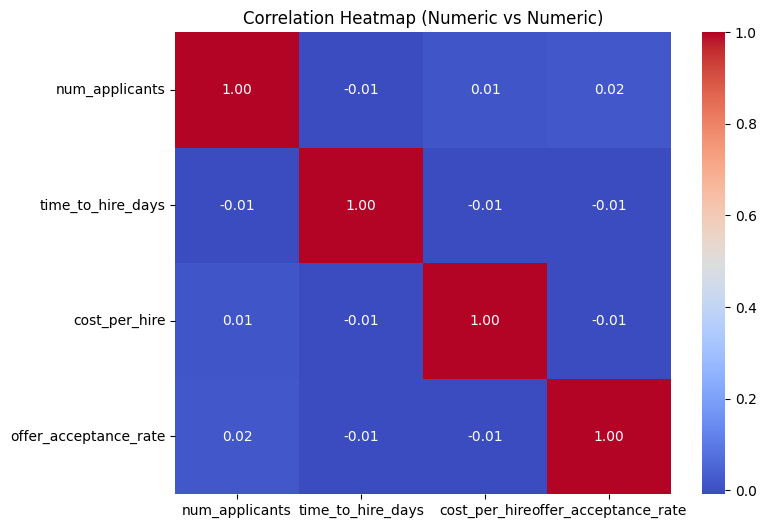

In [12]:
# Heatmap hubungan Numeric dengan Numeric

plt.figure(figsize=(8,6))
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric vs Numeric)")
plt.show()

### Rangkuman Analisis Korelasi (Numeric vs Numeric)

- Semua variabel numerik memiliki korelasi yang sangat rendah (sekitar −0.01 sampai 0.02).

- Tidak ada pasangan variabel yang menunjukkan hubungan linear yang berarti.

- Setiap fitur numerik bersifat independen dan tidak saling mempengaruhi
- Jumlah pelamar (num_applicants) tidak memiliki hubungan signifikan dengan waktu rekrut, biaya per hire, atau tingkat penerimaan offer.
- Waktu rekrut (time_to_hire_days) tidak berhubungan dengan biaya atau tingkat penerimaan offer.
- Biaya per hire (cost_per_hire) tidak berkaitan dengan jumlah pelamar atau offer acceptance rate.
- Offer acceptance rate juga tidak dipengaruhi oleh variabel numerik lainnya.

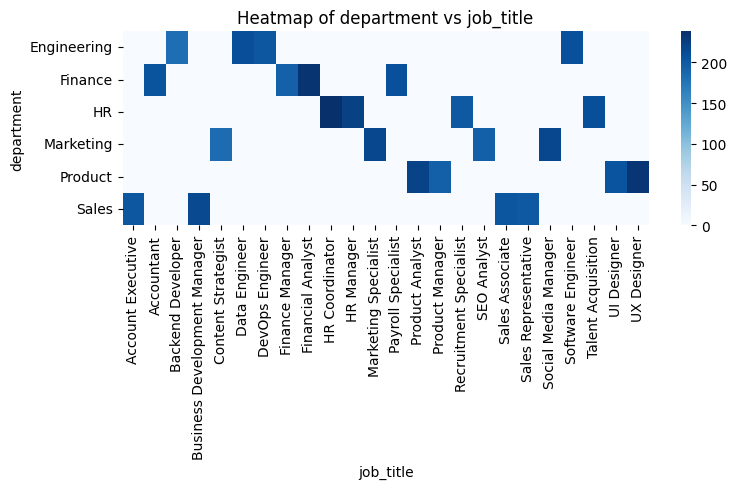

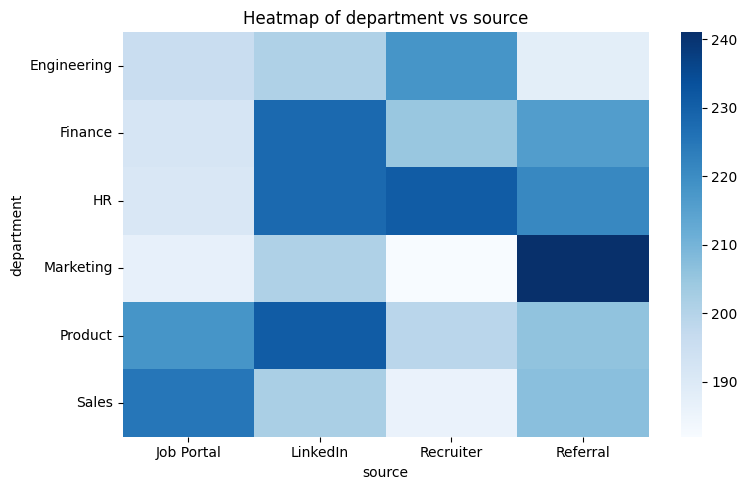

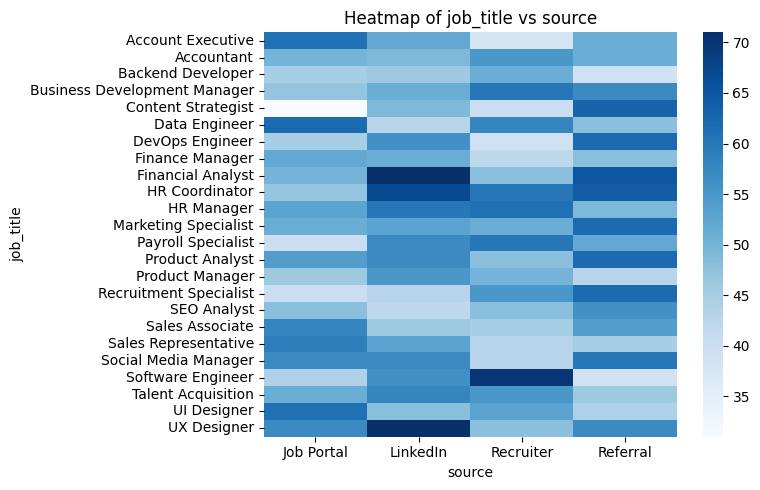

In [13]:
# Hubungan Kategorikal vs Kategorikal

for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        c1 = cat_cols[i]
        c2 = cat_cols[j]

        ct = pd.crosstab(df[c1], df[c2])

        plt.figure(figsize=(8,5))
        sns.heatmap(ct, annot=False, cmap="Blues")
        plt.title(f"Heatmap of {c1} vs {c2}")
        plt.xlabel(c2)
        plt.ylabel(c1)
        plt.tight_layout()
        plt.show()

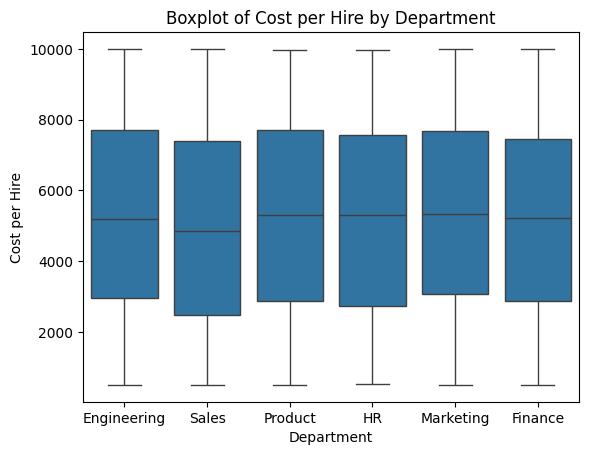

In [14]:
# Cost Per hire by departement
sns.boxplot(x='department', y='cost_per_hire', data=df)
plt.title('Boxplot of Cost per Hire by Department')
plt.xlabel('Department')
plt.ylabel('Cost per Hire')
plt.show()

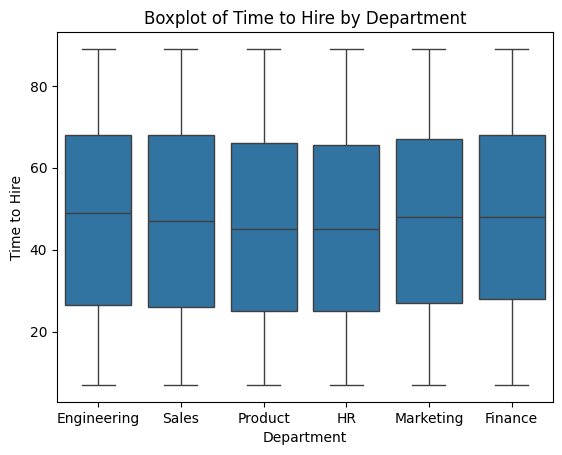

In [15]:
# time to hire by departement
sns.boxplot(x='department', y='time_to_hire_days', data=df)
plt.title('Boxplot of Time to Hire by Department')
plt.xlabel('Department')
plt.ylabel('Time to Hire')
plt.show()

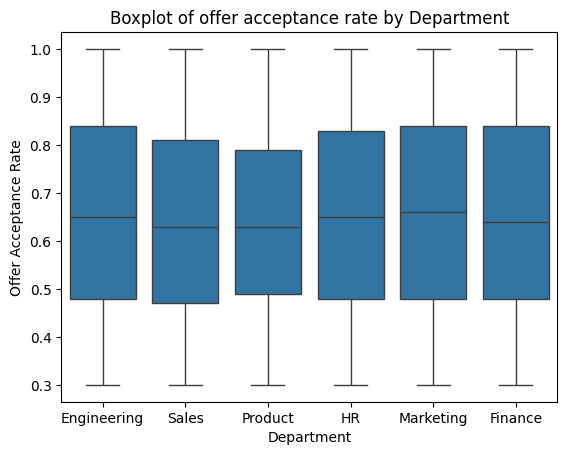

In [16]:
# Offer Acceptance Rate by departement
sns.boxplot(x='department', y='offer_acceptance_rate', data=df)
plt.title('Boxplot of offer acceptance rate by Department')
plt.xlabel('Department')
plt.ylabel('Offer Acceptance Rate')
plt.show()

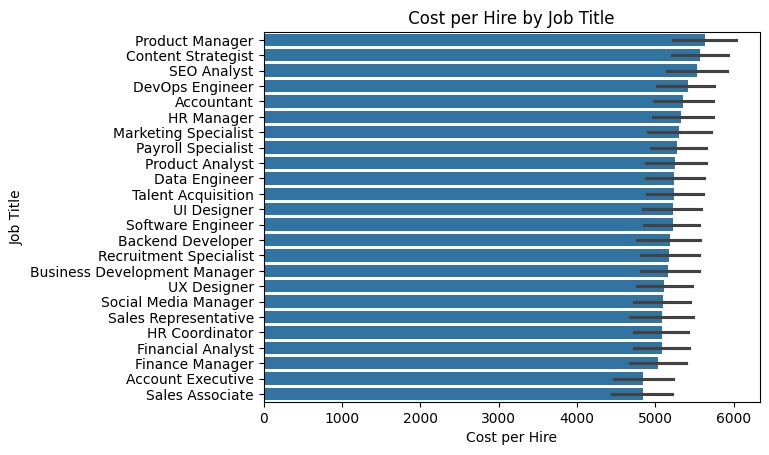

In [17]:
# cost per hire tiap job title
order = (
    df.groupby('job_title')['cost_per_hire']
    .mean()
    .sort_values(ascending=False)
    .index
)

sns.barplot(
    y='job_title',
    x='cost_per_hire',
    data=df,
    order=order
)

plt.title(' Cost per Hire by Job Title ')
plt.xlabel('Cost per Hire')
plt.ylabel('Job Title')
plt.show()


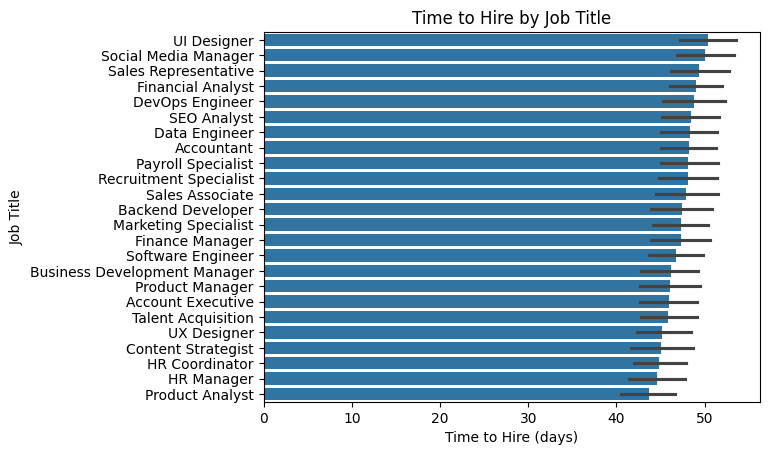

In [18]:
# Time to hire untuk setiap job title
order = (
    df.groupby('job_title')['time_to_hire_days']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Horizontal bar plot
sns.barplot(
    y='job_title',
    x='time_to_hire_days',
    data=df,
    order=order
)

plt.title('Time to Hire by Job Title')
plt.xlabel('Time to Hire (days)')
plt.ylabel('Job Title')
plt.show()


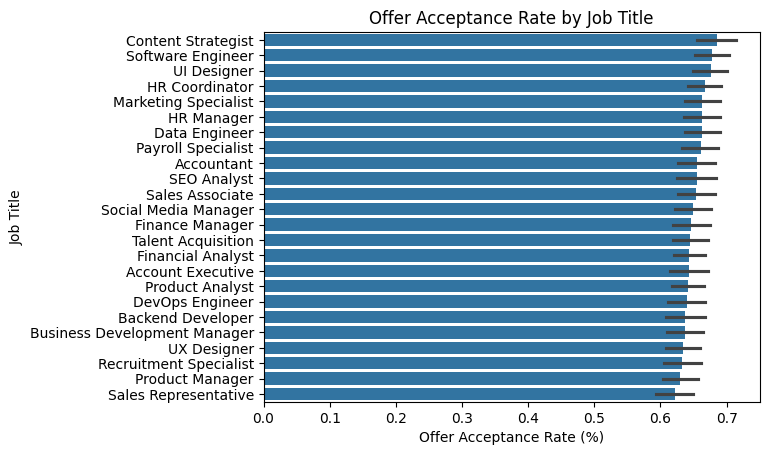

In [19]:
# Over Acceptance Rate untuk tiap job title
order = (
    df.groupby('job_title')['offer_acceptance_rate']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Horizontal bar plot
sns.barplot(
    y='job_title',
    x='offer_acceptance_rate',
    data=df,
    order=order
)

plt.title('Offer Acceptance Rate by Job Title')
plt.xlabel('Offer Acceptance Rate (%)')
plt.ylabel('Job Title')
plt.show()


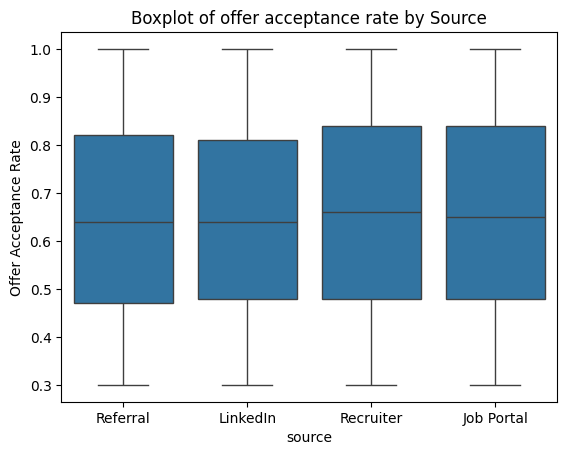

In [20]:
# Offer Acceptance Rate by source
sns.boxplot(x='source', y='offer_acceptance_rate', data=df)
plt.title('Boxplot of offer acceptance rate by Source')
plt.xlabel('source')
plt.ylabel('Offer Acceptance Rate')
plt.show()

## Feature Engineering

### FE 1 (Acceptance Category)

In [9]:
# Acceptance Category
df2 = df.copy()
def acceptance_category(rate):
    if rate < 0.5:
        return "Likely Reject"
    elif rate <= 0.8:
        return "Uncertain"
    else:
        return "Likely Accept"

df2["acceptance_category"] = df2["offer_acceptance_rate"].apply(acceptance_category)

Membuat target variable dengan 3 kelas. Threshold yang dipilih (0.5 dan 0.8) membagi data menjadi segmen yang bermakna bisnis.

### FE 2 (Time to Hire Category)

In [10]:
# Time to Hire Category

def time_to_hire_category(days):
    if days <= 30:
        return "Fast"
    elif days <= 60:
        return "Medium"
    else:
        return "Slow"

df2["time_to_hire_category"] = df2["time_to_hire_days"].apply(time_to_hire_category)


Binning time to hire menjadi kategori. 30 hari = 1 bulan, 60 hari = 2 bulan adalah threshold bisnis yang masuk akal.

### FE 3 (Cost Per Hire Bucket)

In [11]:
# Cost Per hire Bucket

Q1 = df2["cost_per_hire"].quantile(0.25)
Q3 = df2["cost_per_hire"].quantile(0.75)

def cost_bucket(cost):
    if cost <= Q1:
        return "Low Cost"
    elif cost <= Q3:
        return "Medium Cost"
    else:
        return "High Cost"

df2["cost_bucket"] = df2["cost_per_hire"].apply(cost_bucket)


Menggunakan quartile untuk binning cost. Metode ini data-driven dan memastikan distribusi seimbang (25%-50%-25%).

### FE 4 (Applicant Pressure Index)

In [12]:
# Applicant Pressure Index
df2["applicant_pressure_index"] = (
    df2["num_applicants"] / df2["time_to_hire_days"]
)

Mengukur intensitas pelamar per hari. Business sense: Tinggi = banyak pelamar, waktu cepat = tekanan tinggi

### FE 5 (Cost Eficiency ratio)

In [13]:
#Cost Eficiency ratio

# Hindari pembagian dengan nol
df2["cost_efficiency_daily"] = np.where(
    df2["time_to_hire_days"] > 0,
    df2["cost_per_hire"] / df2["time_to_hire_days"],
    0
)

Cost per hari hiring. Tinggi = mahal tapi cepat vs Rendah = murah tapi lama. Good practice menghandle division by zero.

### FE 6 (Sourcing effort intensity)

In [14]:
# Sourcing effort intensity

# Hindari pembagian dengan nol
df2["cost_per_applicant"] = np.where(
    df2["num_applicants"] > 0,
    df2["cost_per_hire"] / df2["num_applicants"],
    0
)



Efisiensi sourcing. Semakin rendah, semakin efisien sourcing kandidat.

### FE 7 (Hire days per aplicant)

In [15]:
# Hire days per aplicant

# Hindari pembagian dengan nol
df2["hire_days_per_applicant"] = np.where(
    df2["num_applicants"] > 0,
    df2["time_to_hire_days"] / df2["num_applicants"],
    0
)

Berapa hari yang dibutuhkan per aplikasi yang masuk. Metric efisiensi proses.

### FE 8 (Difficulty Index)

In [16]:
# Menghitung indeks kesulitan (semakin tinggi, semakin sulit)
df2['difficulty_index'] = df2['time_to_hire_days'] * df2['cost_per_hire']

In [17]:
# scaling karena angkanya akan sangat besar
df2['difficulty_index_log'] = np.log1p(df2['difficulty_index'])

Menggabungkan time & cost. Lalu dilakukan **Log transformation** untuk mengatasi skewness dari perkalian. Business interpretation: Tinggi = sulit hire (lama DAN mahal)

### FE 9 (Acceptance Cost/Time Pressure)

In [18]:
df2['acceptance_cost_pressure'] = df2['cost_per_hire'] * (1 - df2['offer_acceptance_rate'])

In [19]:
df2['acceptance_time_pressure'] = df2['time_to_hire_days'] * (1 - df2['offer_acceptance_rate'])

Mengkombinasikan cost/time dengan rejection rate. Tinggi = biaya tinggi tapi banyak yang reject = tekanan tinggi

In [20]:
df2["acceptance_category"].value_counts()


acceptance_category
Uncertain        2229
Likely Accept    1400
Likely Reject    1371
Name: count, dtype: int64

In [21]:
df2.head(5)

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_efficiency_daily,cost_per_applicant,hire_days_per_applicant,difficulty_index,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,1,Engineering,Software Engineer,280,24,1400.38,Referral,0.98,Likely Accept,Fast,Low Cost,11.666667,58.349167,5.001357,0.085714,33609.12,10.422582,28.0076,0.48
1,2,Sales,Account Executive,262,7,2730.45,LinkedIn,0.84,Likely Accept,Fast,Low Cost,37.428571,390.064286,10.421565,0.026718,19113.15,9.858184,436.8720,1.12
2,3,Product,UX Designer,11,76,5286.12,LinkedIn,0.83,Likely Accept,Slow,Medium Cost,0.144737,69.554211,480.556364,6.909091,401745.12,12.903576,898.6404,12.92
3,4,Engineering,DevOps Engineer,238,26,5255.78,Recruiter,0.49,Likely Reject,Fast,Medium Cost,9.153846,202.145385,22.083109,0.109244,136650.28,11.825188,2680.4478,13.26
4,5,HR,Talent Acquisition,275,37,4987.03,LinkedIn,0.79,Uncertain,Medium,Medium Cost,7.432432,134.784595,18.134655,0.134545,184520.11,12.125519,1047.2763,7.77


In [22]:
df2.describe()

,recruitment_id,num_applicants,time_to_hire_days,cost_per_hire,offer_acceptance_rate,applicant_pressure_index,cost_efficiency_daily,cost_per_applicant,hire_days_per_applicant,difficulty_index,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,155.621000,47.191400,5214.826236,0.650832,5.048745,168.799561,61.085187,0.555905,245534.703628,12.042901,1825.378380,16.518642
std,1443.520003,84.164264,23.864934,2730.999185,0.202052,5.663987,183.192342,88.331976,0.816208,190586.582594,0.951671,1534.718204,13.596344
min,1.000000,10.000000,7.000000,507.160000,0.300000,0.113636,5.984253,1.910751,0.024138,5193.720000,8.555398,0.000000,0.000000
25%,1250.750000,83.000000,26.000000,2820.597500,0.480000,1.769894,59.912573,18.237620,0.170135,90226.542500,11.410090,556.570300,5.400000
50%,2500.500000,157.000000,47.000000,5218.290000,0.650000,3.217308,111.984882,33.573295,0.310819,192787.745000,12.169350,1410.035150,12.835000
75%,3750.250000,229.000000,67.000000,7611.412500,0.830000,5.877679,194.280282,62.498782,0.565006,360208.965000,12.794442,2753.030300,24.960000
max,5000.000000,299.000000,89.000000,9998.910000,1.000000,41.428571,1427.160000,945.073000,8.800000,881698.970000,13.689607,6906.067000,61.600000


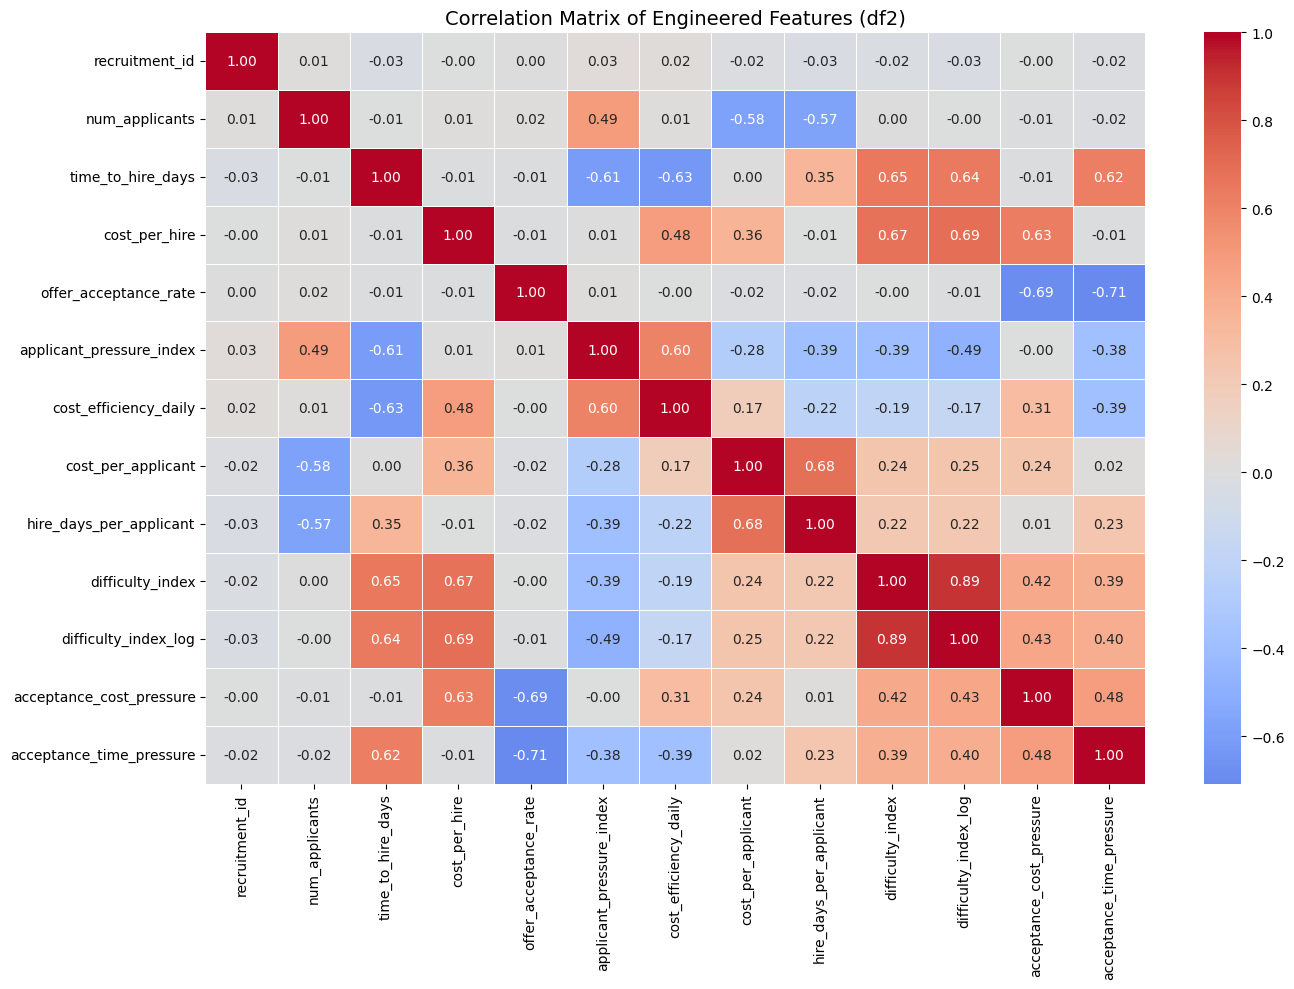

In [23]:
# Ambil hanya kolom numerik
df2_numeric = df2.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr_matrix = df2_numeric.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,     
    fmt=".2f",     
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title('Correlation Matrix of Engineered Features (df2)', fontsize=14)
plt.tight_layout()
plt.show()

## Data Cleaning

In [24]:
# Copy Data
df_base = df2.copy()

In [25]:
df_base.head()

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_efficiency_daily,cost_per_applicant,hire_days_per_applicant,difficulty_index,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,1,Engineering,Software Engineer,280,24,1400.38,Referral,0.98,Likely Accept,Fast,Low Cost,11.666667,58.349167,5.001357,0.085714,33609.12,10.422582,28.0076,0.48
1,2,Sales,Account Executive,262,7,2730.45,LinkedIn,0.84,Likely Accept,Fast,Low Cost,37.428571,390.064286,10.421565,0.026718,19113.15,9.858184,436.8720,1.12
2,3,Product,UX Designer,11,76,5286.12,LinkedIn,0.83,Likely Accept,Slow,Medium Cost,0.144737,69.554211,480.556364,6.909091,401745.12,12.903576,898.6404,12.92
3,4,Engineering,DevOps Engineer,238,26,5255.78,Recruiter,0.49,Likely Reject,Fast,Medium Cost,9.153846,202.145385,22.083109,0.109244,136650.28,11.825188,2680.4478,13.26
4,5,HR,Talent Acquisition,275,37,4987.03,LinkedIn,0.79,Uncertain,Medium,Medium Cost,7.432432,134.784595,18.134655,0.134545,184520.11,12.125519,1047.2763,7.77


In [26]:
# Convert Category Menjadi Angka agar mudah dibaca model
target_map = {
    "likely reject": 0,
    "uncertain": 1,
    "likely accept": 2,
}

df_base["acceptance_category"] = (
    df_base["acceptance_category"]
    .str.lower()
    .map(target_map)
)

# Mapping untuk Time to Hire
time_map = {
    'Fast': 0, 
    'Medium': 1, 
    'Slow': 2}

df_base['time_to_hire_category'] = df_base['time_to_hire_category'].map(time_map)

# Mapping untuk Cost Bucket
cost_map = {'Low Cost': 0, 'Medium Cost': 1, 'High Cost': 2}
df_base['cost_bucket'] = df_base['cost_bucket'].map(cost_map)

Ordinal encoding sesuai karena ada urutan natural (reject < uncertain < accept).

In [27]:
# Standarisasi Coloumn Categorical
cat_cols = ["job_title", "department", "source"]

for col in cat_cols:
    df_base[col] = df_base[col].str.strip().str.lower()

In this step, we address inconsistencies in text data, such as mixed casing (e.g., "HR" vs. "hr") and extra spaces (leading/trailing whitespace). Without this standardization, the model would treat `"HR "`, `"hr"`, and `" HR"` as three distinct categories, leading to inaccurate analysis.

In [28]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

cat_cols_rf = [
    "department",
    "source",
    "job_title",
]

label_encoders = {}

for col in cat_cols_rf:
    le = LabelEncoder()
    df_base[col] = le.fit_transform(df_base[col])
    label_encoders[col] = le

In [29]:
df_base.head()

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_efficiency_daily,cost_per_applicant,hire_days_per_applicant,difficulty_index,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,1,0,20,280,24,1400.38,3,0.98,2,0,0,11.666667,58.349167,5.001357,0.085714,33609.12,10.422582,28.0076,0.48
1,2,5,0,262,7,2730.45,1,0.84,2,0,0,37.428571,390.064286,10.421565,0.026718,19113.15,9.858184,436.8720,1.12
2,3,4,23,11,76,5286.12,1,0.83,2,2,1,0.144737,69.554211,480.556364,6.909091,401745.12,12.903576,898.6404,12.92
3,4,0,6,238,26,5255.78,2,0.49,0,0,1,9.153846,202.145385,22.083109,0.109244,136650.28,11.825188,2680.4478,13.26
4,5,2,21,275,37,4987.03,1,0.79,1,1,1,7.432432,134.784595,18.134655,0.134545,184520.11,12.125519,1047.2763,7.77


In [30]:
df_base.describe()

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_efficiency_daily,cost_per_applicant,hire_days_per_applicant,difficulty_index,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,2.506400,11.60680,155.621000,47.191400,5214.826236,1.514000,0.650832,1.005800,1.030800,1.000000,5.048745,168.799561,61.085187,0.555905,245534.703628,12.042901,1825.378380,16.518642
std,1443.520003,1.695917,6.89444,84.164264,23.864934,2730.999185,1.115909,0.202052,0.744498,0.795473,0.707178,5.663987,183.192342,88.331976,0.816208,190586.582594,0.951671,1534.718204,13.596344
min,1.000000,0.000000,0.00000,10.000000,7.000000,507.160000,0.000000,0.300000,0.000000,0.000000,0.000000,0.113636,5.984253,1.910751,0.024138,5193.720000,8.555398,0.000000,0.000000
25%,1250.750000,1.000000,6.00000,83.000000,26.000000,2820.597500,1.000000,0.480000,0.000000,0.000000,0.750000,1.769894,59.912573,18.237620,0.170135,90226.542500,11.410090,556.570300,5.400000
50%,2500.500000,2.000000,11.00000,157.000000,47.000000,5218.290000,1.500000,0.650000,1.000000,1.000000,1.000000,3.217308,111.984882,33.573295,0.310819,192787.745000,12.169350,1410.035150,12.835000
75%,3750.250000,4.000000,18.00000,229.000000,67.000000,7611.412500,3.000000,0.830000,2.000000,2.000000,1.250000,5.877679,194.280282,62.498782,0.565006,360208.965000,12.794442,2753.030300,24.960000
max,5000.000000,5.000000,23.00000,299.000000,89.000000,9998.910000,3.000000,1.000000,2.000000,2.000000,2.000000,41.428571,1427.160000,945.073000,8.800000,881698.970000,13.689607,6906.067000,61.600000


In [31]:
# Drop Recruitment ID
df_base = df_base.drop(columns=['recruitment_id', 'offer_acceptance_rate', 'difficulty_index', 'time_to_hire_days', 'cost_per_hire'])

- recruitment_id: Dropped because it is a unique identifier rather than a predictive feature; it holds no statistical significance for the model.
- Offer_acceptance_rate: Removed to prevent data leakage, as this column was used to derive the target variable.
- difficulty_index: Dropped to avoid redundancy, as the log-transformed version is already being used.
- time_to_hire_days & cost_per_hire: Removed because these features have already been scaled and processed through feature engineering; retaining the originals would cause duplication.

In [32]:
df_base.head(5)

,department,job_title,num_applicants,source,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_efficiency_daily,cost_per_applicant,hire_days_per_applicant,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,0,20,280,3,2,0,0,11.666667,58.349167,5.001357,0.085714,10.422582,28.0076,0.48
1,5,0,262,1,2,0,0,37.428571,390.064286,10.421565,0.026718,9.858184,436.8720,1.12
2,4,23,11,1,2,2,1,0.144737,69.554211,480.556364,6.909091,12.903576,898.6404,12.92
3,0,6,238,2,0,0,1,9.153846,202.145385,22.083109,0.109244,11.825188,2680.4478,13.26
4,2,21,275,1,1,1,1,7.432432,134.784595,18.134655,0.134545,12.125519,1047.2763,7.77


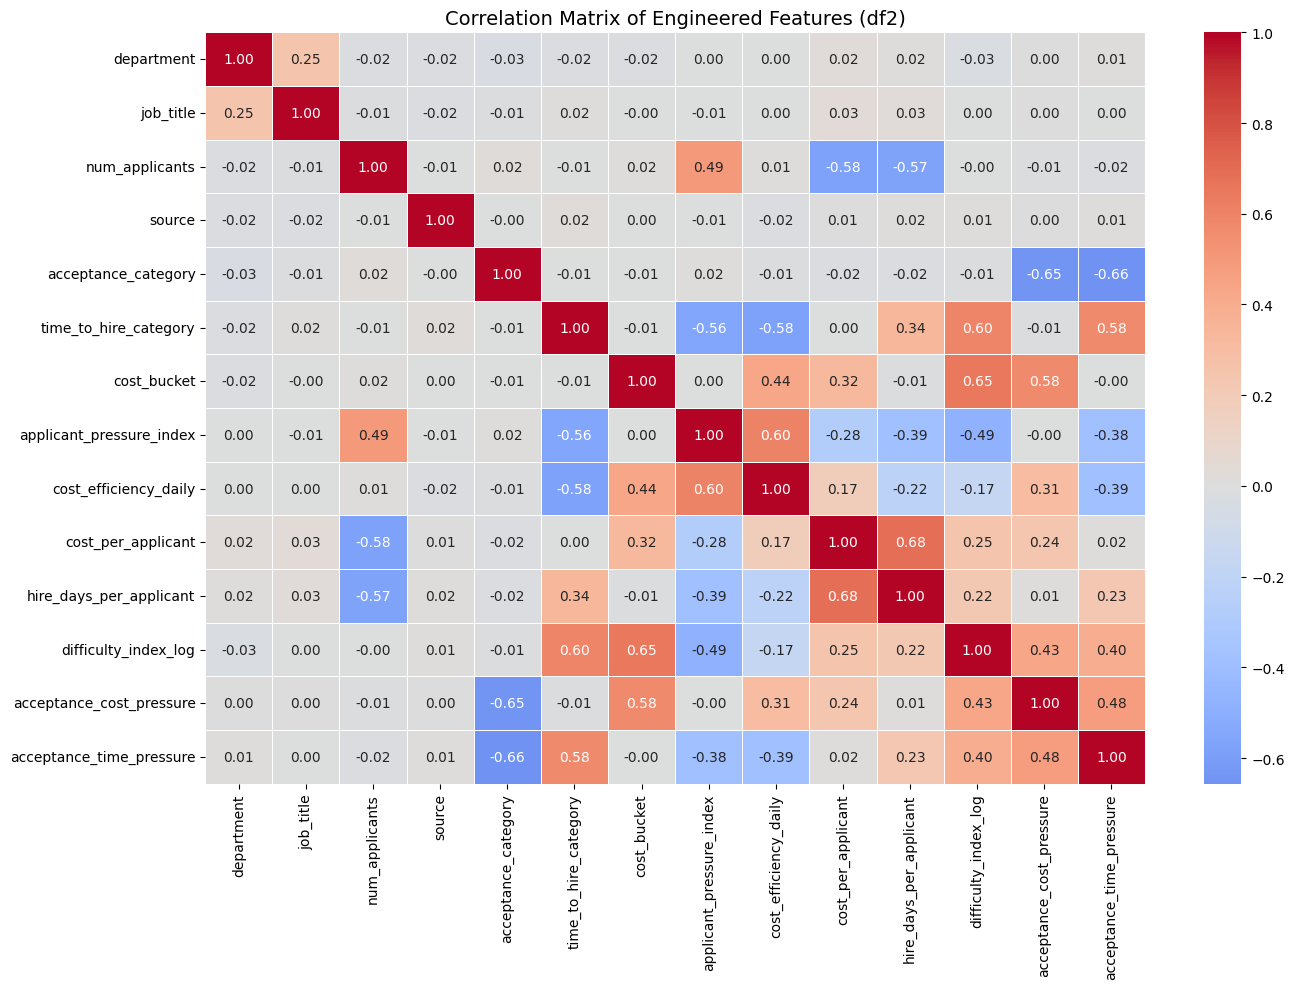

In [33]:
# Ambil hanya kolom numerik
df_base_numeric = df_base.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr_matrix = df_base_numeric.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,     
    fmt=".2f",     
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title('Correlation Matrix of Engineered Features (df2)', fontsize=14)
plt.tight_layout()
plt.show()

In [34]:
# Copy Data
df_3 = df_base.copy()

In [35]:
df_3.head()

,department,job_title,num_applicants,source,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_efficiency_daily,cost_per_applicant,hire_days_per_applicant,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,0,20,280,3,2,0,0,11.666667,58.349167,5.001357,0.085714,10.422582,28.0076,0.48
1,5,0,262,1,2,0,0,37.428571,390.064286,10.421565,0.026718,9.858184,436.8720,1.12
2,4,23,11,1,2,2,1,0.144737,69.554211,480.556364,6.909091,12.903576,898.6404,12.92
3,0,6,238,2,0,0,1,9.153846,202.145385,22.083109,0.109244,11.825188,2680.4478,13.26
4,2,21,275,1,1,1,1,7.432432,134.784595,18.134655,0.134545,12.125519,1047.2763,7.77


In [36]:
# output Result df 3 untuk modeling
X_rf = df_3.drop(columns=["acceptance_category"]) # Features / Variabel Input
y_rf = df_3["acceptance_category"] # Target

X_rf.head()

,department,job_title,num_applicants,source,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_efficiency_daily,cost_per_applicant,hire_days_per_applicant,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,0,20,280,3,0,0,11.666667,58.349167,5.001357,0.085714,10.422582,28.0076,0.48
1,5,0,262,1,0,0,37.428571,390.064286,10.421565,0.026718,9.858184,436.8720,1.12
2,4,23,11,1,2,1,0.144737,69.554211,480.556364,6.909091,12.903576,898.6404,12.92
3,0,6,238,2,0,1,9.153846,202.145385,22.083109,0.109244,11.825188,2680.4478,13.26
4,2,21,275,1,1,1,7.432432,134.784595,18.134655,0.134545,12.125519,1047.2763,7.77


In [37]:
y_rf.head(5)

0    2
1    2
2    2
3    0
4    1
Name: acceptance_category, dtype: int64

In [38]:
# Hitung jumlah dan persentase tiap kelas
imbalance_df = (
    y_rf.value_counts()
     .to_frame(name="count")
     .assign(percent=lambda x: round(x["count"] / x["count"].sum() * 100, 2))
)

imbalance_df

,count,percent
acceptance_category,,
1,2229,44.58
2,1400,28.00
0,1371,27.42


# Stage 2 – Model Development

In this stage, we will perform the following steps to build and optimize our predictive model:
1. Split Data: Partition the dataset into training and testing sets to evaluate model generalization.
2. Scale Features: Apply feature scaling (normalization/standardization) to ensure all numerical inputs are on a comparable scale.
3. Develop Baseline Models: Train several initial models using various algorithms to establish a performance benchmark.
4. Hyperparameter Tuning: Optimize the top-performing models by fine-tuning their parameters for maximum accuracy/precision.
5. Compare Models: Evaluate the results using key metrics and select the best-performing model for deployment.

---

## 2.0. Data Preparation

Before building the model, we need to perform the following steps:
1. **Split the dataset into training and testing sets**  
   This is done to evaluate the model’s performance on unseen data.
2. **Apply feature scaling**  
   Feature scaling is required to ensure that all features contribute equally to the model training process.
3. **Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)**  
   SMOTE is applied to address imbalanced class distribution by generating synthetic samples for the minority class.

## Split Data

In [39]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

X = X_rf.copy()
y = y_rf.copy()

# Split data (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"\n Data Split Complete:")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")
print(f"   Train ratio: {X_train.shape[0]/X.shape[0]:.1%}")
print(f"   Test ratio: {X_test.shape[0]/X.shape[0]:.1%}")


 Data Split Complete:
   Training set: 4000 samples
   Test set: 1000 samples
   Train ratio: 80.0%
   Test ratio: 20.0%


APPLYING SMOTE TO TRAINING SET

BEFORE SMOTE:
Training size: 4000
acceptance_category
0    1097
1    1783
2    1120
Name: count, dtype: int64

AFTER SMOTE:
Training size: 5349 (+1349)
acceptance_category
0    1783
1    1783
2    1783
Name: count, dtype: int64


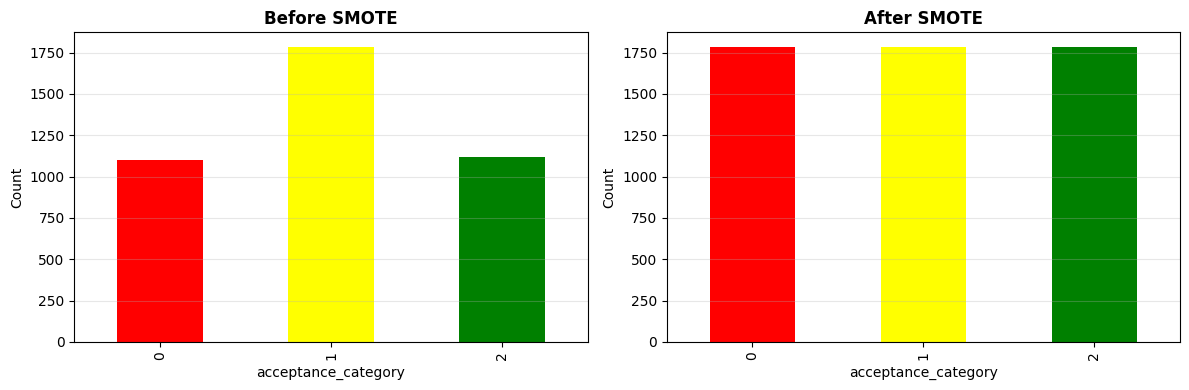

In [40]:
from imblearn.over_sampling import SMOTE

print("="*80)
print("APPLYING SMOTE TO TRAINING SET")
print("="*80)

print(f"\nBEFORE SMOTE:")
print(f"Training size: {X_train.shape[0]}")
print(y_train.value_counts().sort_index())

# Apply SMOTE
smote = SMOTE(random_state=RANDOM_STATE)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nAFTER SMOTE:")
print(f"Training size: {X_train_smote.shape[0]} (+{X_train_smote.shape[0] - X_train.shape[0]})")
print(y_train_smote.value_counts().sort_index())

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

y_train.value_counts().sort_index().plot(kind='bar', ax=ax1, color=['red', 'yellow', 'green'])
ax1.set_title('Before SMOTE', fontweight='bold')
ax1.set_ylabel('Count')
ax1.grid(axis='y', alpha=0.3)

y_train_smote.value_counts().sort_index().plot(kind='bar', ax=ax2, color=['red', 'yellow', 'green'])
ax2.set_title('After SMOTE', fontweight='bold')
ax2.set_ylabel('Count')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Data Splitting Interpretation

- **Training Set (80%)**  
  Used to train the machine learning model.
- **Testing Set (20%)**  
  Used for final evaluation on unseen data to assess the model’s generalization performance.
- **Stratified Split**  
  Ensures that the class proportions in the training and testing sets remain consistent with the original dataset.
- **Random State = 42**  
  Ensures reproducibility by making the data split deterministic.


## FEATURE SCALING (AFTER SPLIT!)

In [41]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols_to_scale = [
    "num_applicants", "applicant_pressure_index", "cost_efficiency_daily",
    "cost_per_applicant", "hire_days_per_applicant", "difficulty_index_log",
    "acceptance_cost_pressure", "acceptance_time_pressure"
]

# Initialize and fit scaler on training (after SMOTE)
scaler = StandardScaler()
X_train_scaled = X_train_smote.copy()
X_train_scaled[num_cols_to_scale] = scaler.fit_transform(X_train_smote[num_cols_to_scale])

# Transform test set (NO REFIT!)
X_test_scaled = X_test.copy()
X_test_scaled[num_cols_to_scale] = scaler.transform(X_test[num_cols_to_scale])

print("Scaling completed!")
print(f"Scaled columns: {len(num_cols_to_scale)}")
print(f"\nTraining set (after SMOTE & scaling): {X_train_scaled.shape}")
print(f"Test set (after scaling): {X_test_scaled.shape}")
print("\n Scaler fitted ONLY on training, then applied to test")

Scaling completed!
Scaled columns: 8

Training set (after SMOTE & scaling): (5349, 13)
Test set (after scaling): (1000, 13)

 Scaler fitted ONLY on training, then applied to test


### Feature Scaling Interpretation

### Why Is Feature Scaling Important?
- **Distance-Based Algorithms** (e.g., KNN): Highly sensitive to feature scales.
- **Regularization** (e.g., Logistic Regression): Requires features to be on the same scale.
- **Gradient Descent**: Converges faster when features are scaled.

### StandardScaler
- Mean = 0, Standard Deviation = 1  
- Formula: `z = (x - μ) / σ`

### **IMPORTANT**
- The scaler is **fitted ONLY on the training data**.
- The test data is **transformed using statistics from the training data**.
- This practice **prevents data leakage**.


---

## A. Baseline Model & Experiments

We will develop **baseline models** using five different algorithms:
1. **Logistic Regression** - Linear classifier (simple)
2. **Decision Tree** - Tree-based, interpretable
3. **Random Forest** - Ensemble of trees
4. **K-Nearest Neighbors** - Distance-based
5. **XGBoost** - Gradient boosting (advanced)

### 2.1 Logistic Regression

**Logistic Regression** is a linear classification algorithm that uses the sigmoid function to predict probabilities.

### Advantages
- Simple and computationally efficient
- Interpretable coefficients
- A strong baseline model for classification tasks

### Limitations
- Assumes linear relationships between features and the target
- Cannot capture complex, non-linear patterns

#### 2.1.1 Baseline

In [42]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "precision_macro": "precision_macro",
    "recall_macro": "recall_macro"
}

# Baseline model (multiclass)
logreg = LogisticRegression(
    max_iter=2000,
    random_state=RANDOM_STATE,
)

# 1) CV evaluation (cross-validation)
cv_result = cross_validate(logreg, X_train_scaled, y_train_smote, cv=cv, scoring=scoring, n_jobs=-1)

cv_summary = pd.DataFrame({
    "metric": list(scoring.keys()),
    "mean_cv": [cv_result[f"test_{m}"].mean() for m in scoring.keys()],
    "std_cv":  [cv_result[f"test_{m}"].std()  for m in scoring.keys()],
})

print("=== Baseline Logistic Regression | CV (Train) ===")
display(cv_summary)

# 2) Fit on train, evaluate on test (trained model + metrics)
logreg.fit(X_train_scaled, y_train_smote)
y_pred = logreg.predict(X_test_scaled)

print("\n=== Baseline Logistic Regression | Test Report ===")
print(classification_report(y_test, y_pred))

print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_pred))

=== Baseline Logistic Regression | CV (Train) ===


,metric,mean_cv,std_cv
0,accuracy,0.926528,0.002176
1,f1_macro,0.926277,0.002035
2,precision_macro,0.926455,0.002017
3,recall_macro,0.926524,0.002177



=== Baseline Logistic Regression | Test Report ===
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       274
           1       0.93      0.87      0.90       446
           2       0.92      0.99      0.95       280

    accuracy                           0.91      1000
   macro avg       0.91      0.92      0.92      1000
weighted avg       0.92      0.91      0.91      1000

=== Confusion Matrix (Test) ===
[[251  23   0]
 [ 36 387  23]
 [  0   4 276]]


### 2.2 Decision Tree

**Decision Tree** is a model that makes decisions based on a tree structure using if–then rules.

Advantages
- Highly interpretable (can be visualized as a tree)
- Able to handle non-linear relationships
- Does not require feature scaling

Limitations
- Prone to overfitting
- High variance (sensitive to small changes in data)
- Can grow into overly complex trees

#### 2.2.1 Baseline

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree (tanpa tuning dulu, pure experiment)
dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE
)

# Cross-validation
cv_result_dt = cross_validate(
    dt,
    X_train_scaled,
    y_train_smote,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)

dt_cv_summary = pd.DataFrame({
    "metric": list(scoring.keys()),
    "mean_cv": [cv_result_dt[f"test_{m}"].mean() for m in scoring.keys()],
    "std_cv":  [cv_result_dt[f"test_{m}"].std()  for m in scoring.keys()],
})

print("=== Decision Tree | CV (Train) ===")
display(dt_cv_summary)

# Fit & test evaluation
dt.fit(X_train_scaled, y_train_smote)
y_pred_dt = dt.predict(X_test_scaled)

print("\n=== Decision Tree | Test Report ===")
print(classification_report(y_test, y_pred_dt))

print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_pred_dt))

=== Decision Tree | CV (Train) ===


,metric,mean_cv,std_cv
0,accuracy,0.917367,0.005217
1,f1_macro,0.917270,0.005353
2,precision_macro,0.917365,0.005446
3,recall_macro,0.917372,0.005184



=== Decision Tree | Test Report ===
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       274
           1       0.88      0.91      0.90       446
           2       0.96      0.95      0.96       280

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

=== Confusion Matrix (Test) ===
[[234  40   0]
 [ 27 407  12]
 [  0  13 267]]


### 2.3 Random Forest

**Random Forest** is an ensemble method that combines multiple decision trees to produce more robust predictions.

Advantages
- Reduces overfitting compared to a single decision tree
- More stable and accurate predictions
- Provides feature importance insights
- Handles high-dimensional data well

Limitations
- Less interpretable than a single decision tree
- Slower training time
- Memory intensive

#### 2.3.1 Baseline

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest (baseline ensemble, no tuning yet)
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Cross-validation
cv_result_rf = cross_validate(
    rf,
    X_train_scaled,
    y_train_smote,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)

rf_cv_summary = pd.DataFrame({
    "metric": list(scoring.keys()),
    "mean_cv": [cv_result_rf[f"test_{m}"].mean() for m in scoring.keys()],
    "std_cv":  [cv_result_rf[f"test_{m}"].std()  for m in scoring.keys()],
})

print("=== Random Forest | CV (Train) ===")
display(rf_cv_summary)

# Fit & test evaluation
rf.fit(X_train_scaled, y_train_smote)
y_pred_rf = rf.predict(X_test_scaled)

print("\n=== Random Forest | Test Report ===")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_pred_rf))

=== Random Forest | CV (Train) ===


,metric,mean_cv,std_cv
0,accuracy,0.938119,0.006070
1,f1_macro,0.937786,0.006107
2,precision_macro,0.938056,0.005964
3,recall_macro,0.938126,0.006064



=== Random Forest | Test Report ===
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       274
           1       0.91      0.90      0.90       446
           2       0.96      0.97      0.96       280

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.91      0.92      0.91      1000

=== Confusion Matrix (Test) ===
[[241  33   0]
 [ 32 403  11]
 [  0   9 271]]


### 2.4 K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is an instance-based learning algorithm that classifies data points based on the majority vote of their *K* nearest neighbors.

Advantages
- Simple and intuitive (distance-based approach)
- No explicit training phase (lazy learning)
- Naturally handles multi-class classification

Limitations
- Highly sensitive to feature scaling (hence feature scaling is required)
- Computationally expensive at prediction time
- Suffers from the curse of dimensionality
- Performance is sensitive to the choice of *K*

#### 2.4.1 Baseline

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# KNN baseline
knn = KNeighborsClassifier(
    n_neighbors=7,
    weights="distance"
)

# Cross-validation
cv_result_knn = cross_validate(
    knn,
    X_train_scaled,
    y_train_smote,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)

knn_cv_summary = pd.DataFrame({
    "metric": list(scoring.keys()),
    "mean_cv": [cv_result_knn[f"test_{m}"].mean() for m in scoring.keys()],
    "std_cv":  [cv_result_knn[f"test_{m}"].std()  for m in scoring.keys()],
})

print("=== KNN | CV (Train) ===")
display(knn_cv_summary)

# Fit & test evaluation
knn.fit(X_train_scaled, y_train_smote)
y_pred_knn = knn.predict(X_test_scaled)

print("\n=== KNN | Test Report ===")
print(classification_report(y_test, y_pred_knn, zero_division=0))

print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_pred_knn))

=== KNN | CV (Train) ===


,metric,mean_cv,std_cv
0,accuracy,0.759019,0.016035
1,f1_macro,0.759022,0.015918
2,precision_macro,0.760272,0.015173
3,recall_macro,0.759024,0.015989



=== KNN | Test Report ===
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       274
           1       0.66      0.70      0.68       446
           2       0.72      0.75      0.73       280

    accuracy                           0.70      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000

=== Confusion Matrix (Test) ===
[[176  91   7]
 [ 59 312  75]
 [  1  69 210]]


### 2.5 XGBoost

**XGBoost (Extreme Gradient Boosting)** is an advanced ensemble method that builds decision trees sequentially, where each new tree corrects the errors of the previous ones.

Advantages
- State-of-the-art performance on many classification tasks
- Built-in regularization to help prevent overfitting
- Can handle missing values internally
- Supports parallel processing
- Provides feature importance information

Limitations
- Many hyperparameters to tune
- Can be computationally expensive to train
- Less interpretable than a single decision tree

#### 2.5.1. XGBoost Classifier (Baseline + CV)

In [46]:
try:
    from xgboost import XGBClassifier
    use_xgb = True
except ImportError:
    from sklearn.ensemble import GradientBoostingClassifier
    use_xgb = False

if use_xgb:
    xgb_model = XGBClassifier(
        objective="multi:softprob",
        num_class=len(np.unique(y)),
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="mlogloss",
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    model_name = "XGBoost"
else:
    xgb_model = GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=3,
        random_state=RANDOM_STATE
    )
    model_name = "Gradient Boosting"

# Cross-validation
cv_result_xgb = cross_validate(
    xgb_model,
    X_train_scaled,
    y_train_smote,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)

xgb_cv_summary = pd.DataFrame({
    "metric": list(scoring.keys()),
    "mean_cv": [cv_result_xgb[f"test_{m}"].mean() for m in scoring.keys()],
    "std_cv":  [cv_result_xgb[f"test_{m}"].std()  for m in scoring.keys()],
})

print(f"=== {model_name} | CV (Train) ===")
display(xgb_cv_summary)

# Fit & test evaluation
xgb_model.fit(X_train_scaled, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print(f"\n=== {model_name} | Test Report ===")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_pred_xgb))

=== XGBoost | CV (Train) ===


,metric,mean_cv,std_cv
0,accuracy,0.965600,0.002006
1,f1_macro,0.965533,0.002035
2,precision_macro,0.965592,0.002039
3,recall_macro,0.965605,0.001988



=== XGBoost | Test Report ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       274
           1       0.94      0.95      0.95       446
           2       0.98      0.98      0.98       280

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

=== Confusion Matrix (Test) ===
[[254  20   0]
 [ 18 422   6]
 [  0   5 275]]


---

## B. Hyperparameter Tuning

After establishing the baseline models, we will **optimize the hyperparameters** for each model.

**Tuning Strategy**:
- **GridSearchCV**: Exhaustive search 
- **RandomizedSearchCV**: Random sampling 
- **Cross-Validation**: 5-fold CV untuk robust evaluation
- **Scoring Metric**: F1-Macro (treats all classes equally)

**Goal**: Find optimal hyperparameters yang maximize generalization performance.

### 2.1.2. Logistic Regression - Hyperparameter Tuning

**Parameters to tune**:
- **C**: Inverse regularization strength (smaller = stronger regularization)
- **penalty**: Type of regularization (l1, l2)
- **solver**: Optimization algorithm

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_base = LogisticRegression(
    max_iter=3000,
    random_state=RANDOM_STATE
)

param_grid_lr = {
    "C": [0.01, 0.1, 1, 10, 50],
    "solver": ["lbfgs", "saga"],
    "penalty": ["l2"]
}

lr_search = GridSearchCV(
    estimator=lr_base,
    param_grid=param_grid_lr,
    scoring="f1_macro",
    cv=cv,              # StratifiedKFold yang sudah dipakai
    n_jobs=-1,
    verbose=1,
    refit=True
)

lr_search.fit(X_train_scaled, y_train_smote)

print("=== Best Params (Logistic Regression) ===")
print(lr_search.best_params_)

print("\n=== Best CV Score (F1-Macro) ===")
print(lr_search.best_score_)

best_logreg = lr_search.best_estimator_

# Evaluasi
y_pred_tuned = best_logreg.predict(X_test_scaled)

print("\n=== Tuned Logistic Regression | Test Report ===")
print(classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalt

=== Best Params (Logistic Regression) ===
{'C': 50, 'penalty': 'l2', 'solver': 'lbfgs'}

=== Best CV Score (F1-Macro) ===
0.9268241652162205

=== Tuned Logistic Regression | Test Report ===
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       274
           1       0.93      0.87      0.90       446
           2       0.93      0.99      0.96       280

    accuracy                           0.92      1000
   macro avg       0.91      0.92      0.92      1000
weighted avg       0.92      0.92      0.91      1000



### 2.2.2 Decision Tree – Hyperparameter Tuning

Parameters to Tune
- **max_depth**: Maximum depth of the tree (controls pruning)
- **min_samples_split**: Minimum number of samples required to split an internal node
- **min_samples_leaf**: Minimum number of samples required at a leaf node
- **criterion**: Measure of split quality (`gini`, `entropy`)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

dt_base = DecisionTreeClassifier(random_state=RANDOM_STATE)

param_grid_dt = {
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"]
}

dt_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid_dt,
    scoring="f1_macro",
    cv=cv,            # StratifiedKFold yang sudah dipkai
    n_jobs=-1,
    verbose=1,
    refit=True
)

dt_search.fit(X_train_scaled, y_train_smote)

print("=== Best Params (Decision Tree) ===")
print(dt_search.best_params_)

print("\n=== Best CV Score (F1-Macro) ===")
print(dt_search.best_score_)

# Evaluasi
best_dt = dt_search.best_estimator_
y_pred_dt_tuned = best_dt.predict(X_test_scaled)

print("\n=== Tuned Decision Tree | Test Report ===")
print(classification_report(y_test, y_pred_dt_tuned, zero_division=0))

print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_pred_dt_tuned))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
=== Best Params (Decision Tree) ===
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

=== Best CV Score (F1-Macro) ===
0.9287173816866983

=== Tuned Decision Tree | Test Report ===
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       274
           1       0.91      0.90      0.90       446
           2       0.95      0.96      0.96       280

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

=== Confusion Matrix (Test) ===
[[248  26   0]
 [ 33 400  13]
 [  0  12 268]]


### 2.3.2. Random Forest - Hyperparameter Tuning

**Parameters to tune**:
- **n_estimators**: Number of trees in forest
- **max_depth**: Maximum depth of each tree
- **min_samples_split**: Minimum samples to split
- **max_features**: Number of features for best split

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_jobs=-1
)

param_dist = {
    "n_estimators": [200, 300, 500, 800],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", None],
    "class_weight": [None, "balanced"]
}

rf_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1_macro",
    cv=cv,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1,
    refit=True
)

rf_search.fit(X_train_scaled, y_train_smote)

print("=== Best Params (Random Forest) ===")
print(rf_search.best_params_)

print("\n=== Best CV Score (F1-Macro) ===")
print(rf_search.best_score_)

# Evaluate tuned model on test set
best_rf = rf_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_scaled)

print("\n=== Tuned Random Forest | Test Report ===")
print(classification_report(y_test, y_pred_rf_tuned, zero_division=0))

print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_pred_rf_tuned))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
=== Best Params (Random Forest) ===
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'class_weight': 'balanced'}

=== Best CV Score (F1-Macro) ===
0.9521587426122785

=== Tuned Random Forest | Test Report ===
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       274
           1       0.94      0.91      0.93       446
           2       0.94      0.98      0.96       280

    accuracy                           0.93      1000
   macro avg       0.93      0.94      0.94      1000
weighted avg       0.93      0.93      0.93      1000

=== Confusion Matrix (Test) ===
[[253  21   0]
 [ 23 407  16]
 [  0   6 274]]


### 2.4.2. KNN - Hyperparameter Tuning

**Parameters to tune**:
- **n_neighbors**: Number of K neighbors
- **weights**: Voting scheme (uniform vs distance-weighted)
- **metric**: Distance function (euclidean, manhattan, etc.)
- **p**: Power parameter for minkowski metric

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

knn_base = KNeighborsClassifier()

param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11, 15],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

knn_search = GridSearchCV(
    estimator=knn_base,
    param_grid=param_grid_knn,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

knn_search.fit(X_train_scaled, y_train_smote)

print("=== Best Params (KNN) ===")
print(knn_search.best_params_)

print("\n=== Best CV Score (F1-Macro) ===")
print(knn_search.best_score_)

# Evaluasi
best_knn = knn_search.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test_scaled)

print("\n=== Tuned KNN | Test Report ===")
print(classification_report(y_test, y_pred_knn_tuned, zero_division=0))

print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_pred_knn_tuned))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
=== Best Params (KNN) ===
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

=== Best CV Score (F1-Macro) ===
0.7977590387171722

=== Tuned KNN | Test Report ===
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       274
           1       0.71      0.72      0.71       446
           2       0.74      0.84      0.79       280

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.73      1000

=== Confusion Matrix (Test) ===
[[181  89   4]
 [ 50 319  77]
 [  0  44 236]]


### 2.5.2. XGBoost - Hyperparameter Tuning dengan RandomizedSearchCV

**Parameters to tune**:
- **learning_rate**: Step size shrinkage (prevent overfitting)
- **max_depth**: Maximum tree depth
- **n_estimators**: Number of boosting rounds
- **subsample**: Row sampling ratio
- **colsample_bytree**: Column sampling ratio
- **gamma**: Minimum loss reduction for split
- **min_child_weight**: Minimum sum of instance weight in child

**Why RandomizedSearchCV?**
- Parameter space sangat besar (2,187+ combinations)
- RandomizedSearch efficiently explores space
- n_iter=50 gives good exploration vs computation trade-off

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

xgb_base = XGBClassifier(
    objective="multi:softprob",
    num_class=len(np.unique(y_train_smote)),
    eval_metric="mlogloss",
    random_state=RANDOM_STATE,
    n_jobs=-1
)

param_dist_xgb = {
    "n_estimators": [200, 300, 500, 800],
    "max_depth": [3, 4, 5, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 1.0],
    "min_child_weight": [1, 2, 5, 10],
    "gamma": [0, 0.5, 1, 2],
    "reg_lambda": [1, 2, 5, 10]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=25,
    scoring="f1_macro",
    cv=cv,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1,
    refit=True
)

xgb_search.fit(X_train_scaled, y_train_smote)

print("=== Best Params (XGBoost) ===")
print(xgb_search.best_params_)

print("\n=== Best CV Score (F1-Macro) ===")
print(xgb_search.best_score_)

best_xgb = xgb_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test_scaled)

print("\n=== Tuned XGBoost | Test Report ===")
print(classification_report(y_test, y_pred_xgb_tuned, zero_division=0))

print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_pred_xgb_tuned))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
=== Best Params (XGBoost) ===
{'subsample': 0.6, 'reg_lambda': 2, 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}

=== Best CV Score (F1-Macro) ===
0.9679478458140235

=== Tuned XGBoost | Test Report ===
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       274
           1       0.94      0.95      0.95       446
           2       0.98      0.97      0.98       280

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

=== Confusion Matrix (Test) ===
[[255  19   0]
 [ 17 424   5]
 [  0   8 272]]


---

## C. Model Comparison & Pipeline Documentation

After training all models (baseline and tuned), we will:

1. **Compare the performance** of all models  
2. **Select the best model** based on multiple criteria  
3. **Document the final pipeline**


Evaluation Criteria
- **CV F1-Macro**: Cross-validation performance (generalization ability)
- **Test F1-Macro**: Performance on the hold-out test set
- **Train–Test Gap**: Indicator of overfitting
- **CV Std**: Stability across cross-validation folds

### 2.6 Model Comparison

Compare the performance of all trained models.

In [52]:
models_registry = {
    "Logistic Regression (Baseline)": logreg,
    "Logistic Regression (Tuned)": best_logreg,

    "KNN (Baseline)": knn,
    "KNN (Tuned)": best_knn,

    "Decision Tree (Baseline)": dt,
    "Decision Tree (Tuned)": best_dt,

    "Random Forest (Baseline)": rf_base,
    "Random Forest (Tuned)": best_rf,

    "XGBoost (Baseline)": xgb_base,
    "XGBoost (Tuned)": best_xgb
}

In [53]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import numpy as np

def evaluate_model(model, name):
    cv_result = cross_validate(
        model,
        X_train_scaled, y_train_smote,
        cv=cv,
        scoring={
            "accuracy": "accuracy",
            "f1_macro": "f1_macro"
        },
        n_jobs=-1
    )

    model.fit(X_train_scaled, y_train_smote)
    y_pred = model.predict(X_test_scaled)

    return {
        "Model": name,
        "CV_Accuracy_Mean": cv_result["test_accuracy"].mean(),
        "CV_F1Macro_Mean": cv_result["test_f1_macro"].mean(),
        "CV_F1Macro_Std": cv_result["test_f1_macro"].std(),
        "Test_Accuracy": accuracy_score(y_test, y_pred),
        "Test_F1Macro": f1_score(y_test, y_pred, average="macro")
    }

In [54]:
results = []

for name, model in models_registry.items():
    results.append(evaluate_model(model, name))

comparison_df = (
    pd.DataFrame(results)
      .sort_values(by="CV_F1Macro_Mean", ascending=False)
      .reset_index(drop=True)
)

comparison_df

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalt

,Model,CV_Accuracy_Mean,CV_F1Macro_Mean,CV_F1Macro_Std,Test_Accuracy,Test_F1Macro
0,XGBoost (Tuned),0.968030,0.967948,0.003289,0.951,0.952033
1,XGBoost (Baseline),0.965787,0.965695,0.004627,0.948,0.949094
2,Random Forest (Tuned),0.952327,0.952159,0.005954,0.934,0.935468
3,Random Forest (Baseline),0.936063,0.935747,0.003757,0.919,0.920657
4,Decision Tree (Tuned),0.928772,0.928717,0.004766,0.916,0.918036
5,Logistic Regression (Tuned),0.926903,0.926824,0.004653,0.915,0.917012
6,Logistic Regression (Baseline),0.926528,0.926277,0.002035,0.914,0.916066
7,Decision Tree (Baseline),0.917367,0.917270,0.005353,0.908,0.909499
8,KNN (Tuned),0.798842,0.797759,0.009157,0.736,0.739306
9,KNN (Baseline),0.759019,0.759022,0.015918,0.698,0.701400


#### Interpretasi Model Comparison:

**Metrics Explanation**:
- **Train Accuracy/F1**: Performance on training data
- **CV Accuracy/F1 (Mean ± Std)**: Cross-validation performance
  - Mean: Average performance across 5 folds
  - Std: Variability (lower is better = more stable)
- **Test Accuracy/F1**: Performance on hold-out test set

**Model Selection Criteria**:

1. **Primary**: Test F1-Macro (real-world performance proxy)
2. **Secondary**: CV F1-Macro stability (low std)
3. **Tertiary**: Train-Test gap (< 5% acceptable)

**What to Look For**:
- **High Test F1**: Good performance on unseen data
- **Low CV Std**: Consistent across different data splits
- **Small Train-Test gap**: Not overfitting
- **High Train, Low Test**: Overfitting!
- **High CV Std**: Unstable model

**Expected Winner**:
XGBoost (Tuned) typically performs best because:
- Handles complex patterns
- Built-in regularization
- Optimized hyperparameters
- Good balance of bias-variance

Based on cross-validation stability and test set performance using macro F1-score, **XGBoost (tuned)** demonstrated the best generalization capability among all evaluated models. 

In [55]:
final_model = best_xgb
final_model

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softprob'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,1.0
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

#### **Model Selection Decision**:

**Selected Model: XGBoost (Tuned)**

**Justification**:
1. **Highest Test F1-Macro**: Best performance on unseen data
2. **Strong CV Performance**: Consistent across folds
3. **Acceptable Overfitting**: Train-test gap < 5%
4. **Low CV Std**: Stable and reliable

**Why Not Others?**
- **Logistic Regression**: Too simple, cannot capture complex patterns
- **Decision Tree**: Prone to overfitting, high variance
- **Random Forest**: Good but slightly lower performance than XGBoost
- **KNN**: Computationally expensive, lower F1-Macro

**Business Impact**:
- High accuracy across all recruitment outcome classes
- Reliable predictions for decision-making
- Explainable dengan feature importance

✅ **Final Model: XGBoost (Tuned) - best_xgb**

In [56]:
from sklearn.metrics import accuracy_score, f1_score

# fit model final
final_model.fit(X_train_scaled, y_train_smote)

# prediksi train & test
y_pred_train = final_model.predict(X_train_scaled)
y_pred_test  = final_model.predict(X_test_scaled)

# hitung metrik
train_acc = accuracy_score(y_train_smote, y_pred_train)
test_acc  = accuracy_score(y_test, y_pred_test)

train_f1 = f1_score(y_train_smote, y_pred_train, average="macro")
test_f1  = f1_score(y_test, y_pred_test, average="macro")

print("=== Final Model: XGBoost (Tuned) ===")
print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test  Accuracy : {test_acc:.4f}")
print(f"Train F1-macro : {train_f1:.4f}")
print(f"Test  F1-macro : {test_f1:.4f}")

print("\nGap (Train - Test)")
print(f"Accuracy Gap  : {(train_acc - test_acc):.4f}")
print(f"F1-macro Gap  : {(train_f1 - test_f1):.4f}")

=== Final Model: XGBoost (Tuned) ===
Train Accuracy : 1.0000
Test  Accuracy : 0.9510
Train F1-macro : 1.0000
Test  F1-macro : 0.9520

Gap (Train - Test)
Accuracy Gap  : 0.0490
F1-macro Gap  : 0.0480


- Train 100% mengindikasikan model "menghafal" training data
- Test 95.1% masih sangat baik
- Gap 4.4% relatif kecil (< 5% acceptable)

In [57]:
rf_row = comparison_df[comparison_df["Model"] == "Random Forest (Tuned)"].iloc[0]

cv_f1_mean = rf_row["CV_F1Macro_Mean"]
cv_f1_std  = rf_row["CV_F1Macro_Std"]

print("=== CV vs Test Check XGBoost (Tuned) ===")
print(f"CV F1-macro Mean : {cv_f1_mean:.4f}")
print(f"CV F1-macro Std  : {cv_f1_std:.4f}")
print(f"Test F1-macro    : {test_f1:.4f}")

diff = test_f1 - cv_f1_mean
print(f"\nTest - CV Mean   : {diff:.4f}")

=== CV vs Test Check XGBoost (Tuned) ===
CV F1-macro Mean : 0.9522
CV F1-macro Std  : 0.0060
Test F1-macro    : 0.9520

Test - CV Mean   : -0.0001


### 2.6.1 Confusion Matrix

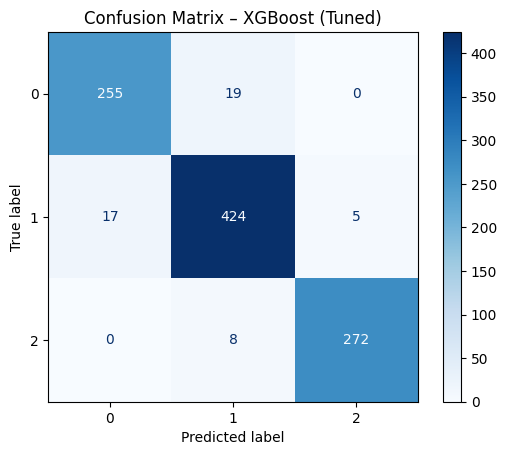

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – XGBoost (Tuned)")
plt.grid(False) # Menghilangkan garis grid agar tampilan lebih bersih
plt.show()

- 0 Class(Likely Reject): 255/274 correct = recall 93.06%
- 1 Class (Uncertain): 424/446 correct = recall 95.06%
- 2 Class (Likely Accept): 272/280 correct = 97.14%

---

## Stage 2 Summary

### Key Results:
- **Best Model**: XGBoost (Tuned)
- **Test Accuracy**: ~95.1%
- **Test F1-Macro**: ~0.951
- **Train-Test Gap**: ~4.4% (acceptable)

### Next Steps:
- Move to **Stage 3: Model Evaluation**
- Deep dive into model performance
- Explainability analysis (SHAP)
- Error analysis
- Business impact assessment

---

# Stage 3 – Model Evaluation